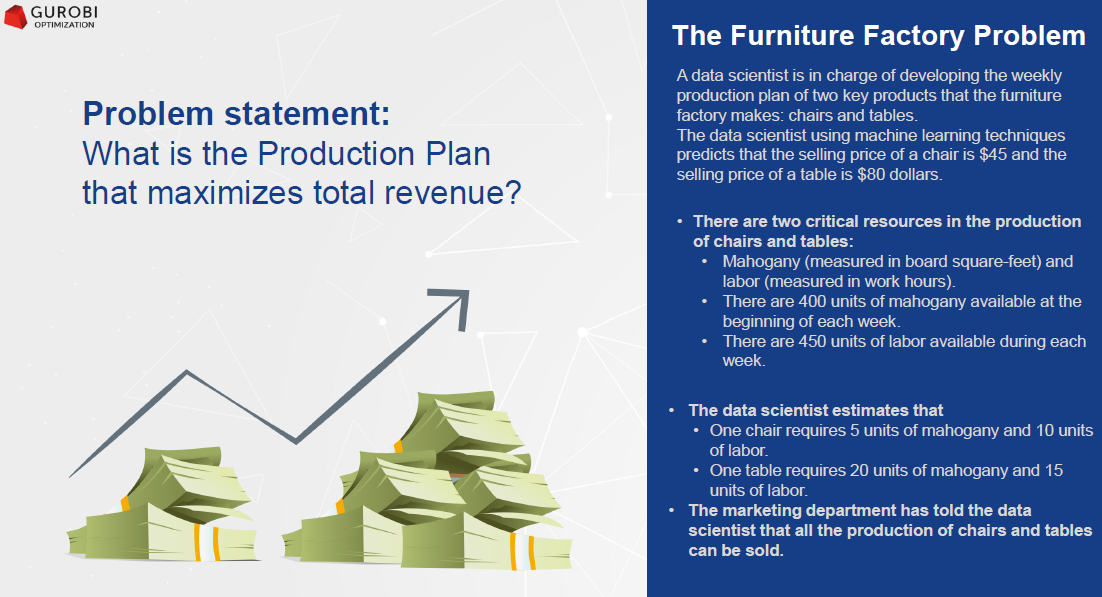

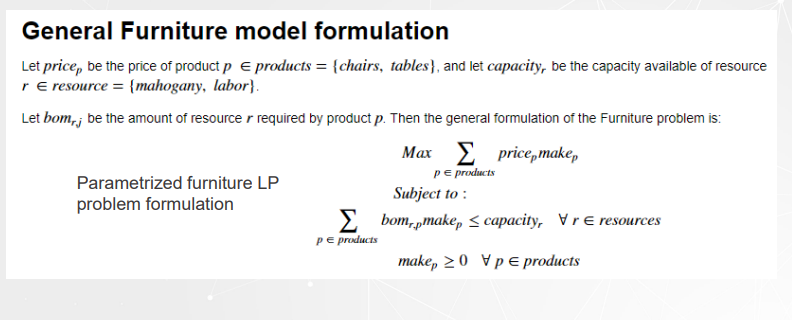

In [30]:
from gurobipy import *

In [31]:
resources, capacity= multidict({
    'mahogony':400, 
    'labor': 450
})

In [32]:
products, price=multidict({
    'chair':45,
    'table':80
})

In [33]:
bom={
    ('mahogony', 'chair'):5,
    ('mahogony', 'table'):20,
    ('labor', 'chair'):10,
    ('labor','table'):15
}

In [34]:
opt_model=Model('furniture')

In [35]:
make=opt_model.addVars(products,name="make")

In [36]:
res=opt_model.addConstrs(((sum(bom[r,p]*make[p] for p in products)<=capacity[r]) for r in resources), name='res')

In [37]:
obj= sum(price[p]*make[p]for p in products)
obj2=opt_model.setObjective(obj, GRB.MAXIMIZE)

In [38]:
opt_model.write('furniture.lp')
opt_model.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xd0437183
Coefficient statistics:
  Matrix range     [5e+00, 2e+01]
  Objective range  [5e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 5e+02]
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.5000000e+31   2.968750e+30   6.500000e+01      0s
       2    2.2000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.200000000e+03


In [39]:
for v in opt_model.getVars():
    if(abs(v.x)>1e-6):
        print(v.varName,v.x)
print('total revenue', opt_model.objVal)

make[chair] 24.0
make[table] 14.0
total revenue 2200.0
